In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import sklearn.metrics
import autosklearn.regression
import matplotlib.pyplot as plt
import pickle

# Auto sklearn

In [42]:
# Load dataset
dataset = pd.read_csv('df_model.csv', index_col=None)
dataset.columns = ["Airline", "Top/Base", "Category", "Country", "Income", "Index", "y"]

# Remove rows with NaN values
dataset = dataset.dropna()

# Drop features
dataset = dataset.drop(['Airline', 'Country'], axis=1)

# Split dataset into features and target variable
X = dataset.drop('y', axis=1)
y = dataset['y']

# Perform one-hot encoding
X_encoded = pd.get_dummies(X, columns=['Top/Base', 'Category'])

# Normalize data
scaler = StandardScaler()
columns_to_scale = ['Income', 'Index']
X_encoded[columns_to_scale] = scaler.fit_transform(X_encoded[columns_to_scale])

# Split data into train and test sets

# X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
#     X_encoded, y, random_state=1
# )
X_train,X_test,y_train,y_test = train_test_split(X_encoded,y,test_size=0.2, random_state=42)

# Create and fit auto-sklearn regressor
automl = autosklearn.regression.AutoSklearnRegressor(time_left_for_this_task=60, n_jobs=-1, memory_limit=-1)
automl.fit(X_train, y_train)

# Get the Score of the final ensemble
train_predictions = automl.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))

test_predictions = automl.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

[WARNING] [2023-03-16 12:12:51,982:Client-AutoML(1):7de2c540-c3eb-11ed-af40-aae9fe84c640] Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (59.619365)
[WARNING] [2023-03-16 12:12:51,982:Client-AutoML(1):7de2c540-c3eb-11ed-af40-aae9fe84c640] Capping the per_run_time_limit to 29.0 to have time for a least 2 models in each process.
          rank  ensemble_weight               type      cost  duration
model_id                                                              
25           1             0.40  gradient_boosting  0.607743  1.379264
24           2             0.02      liblinear_svr  0.656770  0.976027
13           3             0.30  gradient_boosting  0.685369  4.282578
38           4             0.02  gradient_boosting  0.811911  2.479671
12           5             0.26      liblinear_svr  0.944422  1.155691
{12: {'model_id': 12, 'rank': 1, 'cost': 0.9444215925368032, 'ensemble_weight': 0.26, 'data_p

In [44]:
automl.leaderboard()

,rank,ensemble_weight,type,cost,duration
model_id,,,,,
25,1,0.40,gradient_boosting,0.607743,1.379264
24,2,0.02,liblinear_svr,0.656770,0.976027
13,3,0.30,gradient_boosting,0.685369,4.282578
38,4,0.02,gradient_boosting,0.811911,2.479671
12,5,0.26,liblinear_svr,0.944422,1.155691


In [45]:
automl.show_models()

{12: {'model_id': 12,
  'rank': 1,
  'cost': 0.9444215925368032,
  'ensemble_weight': 0.26,
  'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x13517ab50>,
  'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x135222650>,
  'regressor': <autosklearn.pipeline.components.regression.RegressorChoice at 0x135221290>,
  'sklearn_regressor': LinearSVR(C=0.036388789196735646, dual=False, epsilon=0.0012739627397164333,
            loss='squared_epsilon_insensitive', random_state=1,
            tol=0.020180468804448126)},
 13: {'model_id': 13,
  'rank': 2,
  'cost': 0.6853687181549932,
  'ensemble_weight': 0.3,
  'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x135167e50>,
  'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x134d4cf10>,
  'regressor': <autosklearn.pipeline.compon

In [49]:
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))

Train R2 score: 0.7822070384016988


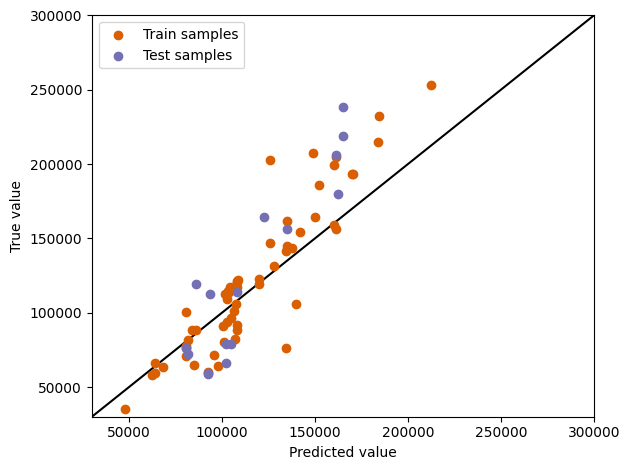

In [55]:
plt.scatter(train_predictions, y_train, label="Train samples", c="#d95f02")
plt.scatter(test_predictions, y_test, label="Test samples", c="#7570b3")
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.plot([30000, 300000], [30000, 300000], c="k", zorder=0)
plt.xlim([30000, 300000])
plt.ylim([30000, 300000])
plt.tight_layout()
plt.show()

# Save the model

In [56]:
# Save the best model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(automl, f)

# Predict

In [ ]:
# Load the saved model
with open('best_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Use the loaded model for predictions
y_prod = loaded_model.predict(X_prod)


# Compare it

In [57]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import sklearn.metrics
import autosklearn.regression
from sklearn.ensemble import RandomForestRegressor

# Load dataset
dataset = pd.read_csv('df_model.csv', index_col=None)
dataset.columns = ["Airline", "Top/Base", "Category", "Country", "Income", "Index", "y"]

# Remove rows with NaN values
dataset = dataset.dropna()

# Drop features
dataset = dataset.drop(['Airline', 'Country'], axis=1)

# Split dataset into features and target variable
X = dataset.drop('y', axis=1)
y = dataset['y']

# Perform one-hot encoding
X_encoded = pd.get_dummies(X, columns=['Top/Base', 'Category'])

# Normalize data
scaler = StandardScaler()
columns_to_scale = ['Income', 'Index']
X_encoded[columns_to_scale] = scaler.fit_transform(X_encoded[columns_to_scale])

# Split data into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X_encoded,y,test_size=0.2, random_state=42)

# Create and fit auto-sklearn regressor
automl = autosklearn.regression.AutoSklearnRegressor(time_left_for_this_task=60, n_jobs=-1, memory_limit=-1)
automl.fit(X_train, y_train)

# Create and fit RandomForestRegressor model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Get the Score of the final ensemble (AutoSklearnRegressor)
train_predictions = automl.predict(X_train)
test_predictions = automl.predict(X_test)
print("AutoSklearnRegressor Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
print("AutoSklearnRegressor Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

# Get the Score of the RandomForestRegressor model
rf_train_predictions = random_forest.predict(X_train)
rf_test_predictions = random_forest.predict(X_test)
print("RandomForestRegressor Train R2 score:", sklearn.metrics.r2_score(y_train, rf_train_predictions))
print("RandomForestRegressor Test R2 score:", sklearn.metrics.r2_score(y_test, rf_test_predictions))


[WARNING] [2023-03-16 16:04:46,501:Client-AutoML(1):e39c45b2-c40b-11ed-af40-aae9fe84c640] Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (59.671666)
[WARNING] [2023-03-16 16:04:46,501:Client-AutoML(1):e39c45b2-c40b-11ed-af40-aae9fe84c640] Capping the per_run_time_limit to 29.0 to have time for a least 2 models in each process.
AutoSklearnRegressor Train R2 score: 0.8299519623415381
AutoSklearnRegressor Test R2 score: 0.6970614961630857
RandomForestRegressor Train R2 score: 0.8473405423240427
RandomForestRegressor Test R2 score: -0.046788217393868736
